In [2]:
import pandas as pd

df_loc = pd.read_csv('./data/U.S. Midwest fields/locations.csv')

df_loc

,site,location_id,X,Y
0,NE,101A0003,-96.454699,41.152080
1,NE,101A0005,-96.454464,41.151848
2,NE,101A0006,-96.454460,41.151740
3,NE,101A0001,-96.454484,41.152296
4,NE,101A0004,-96.454372,41.151906
...,...,...,...,...
1165,IL-RT,RT-M5,-88.156262,39.885019
1166,IL-RT,RT-M6,-88.156260,39.884686
1167,IL-RT,RT-M7,-88.156261,39.884352
1168,IL-RT,RT-M8,-88.156258,39.884017


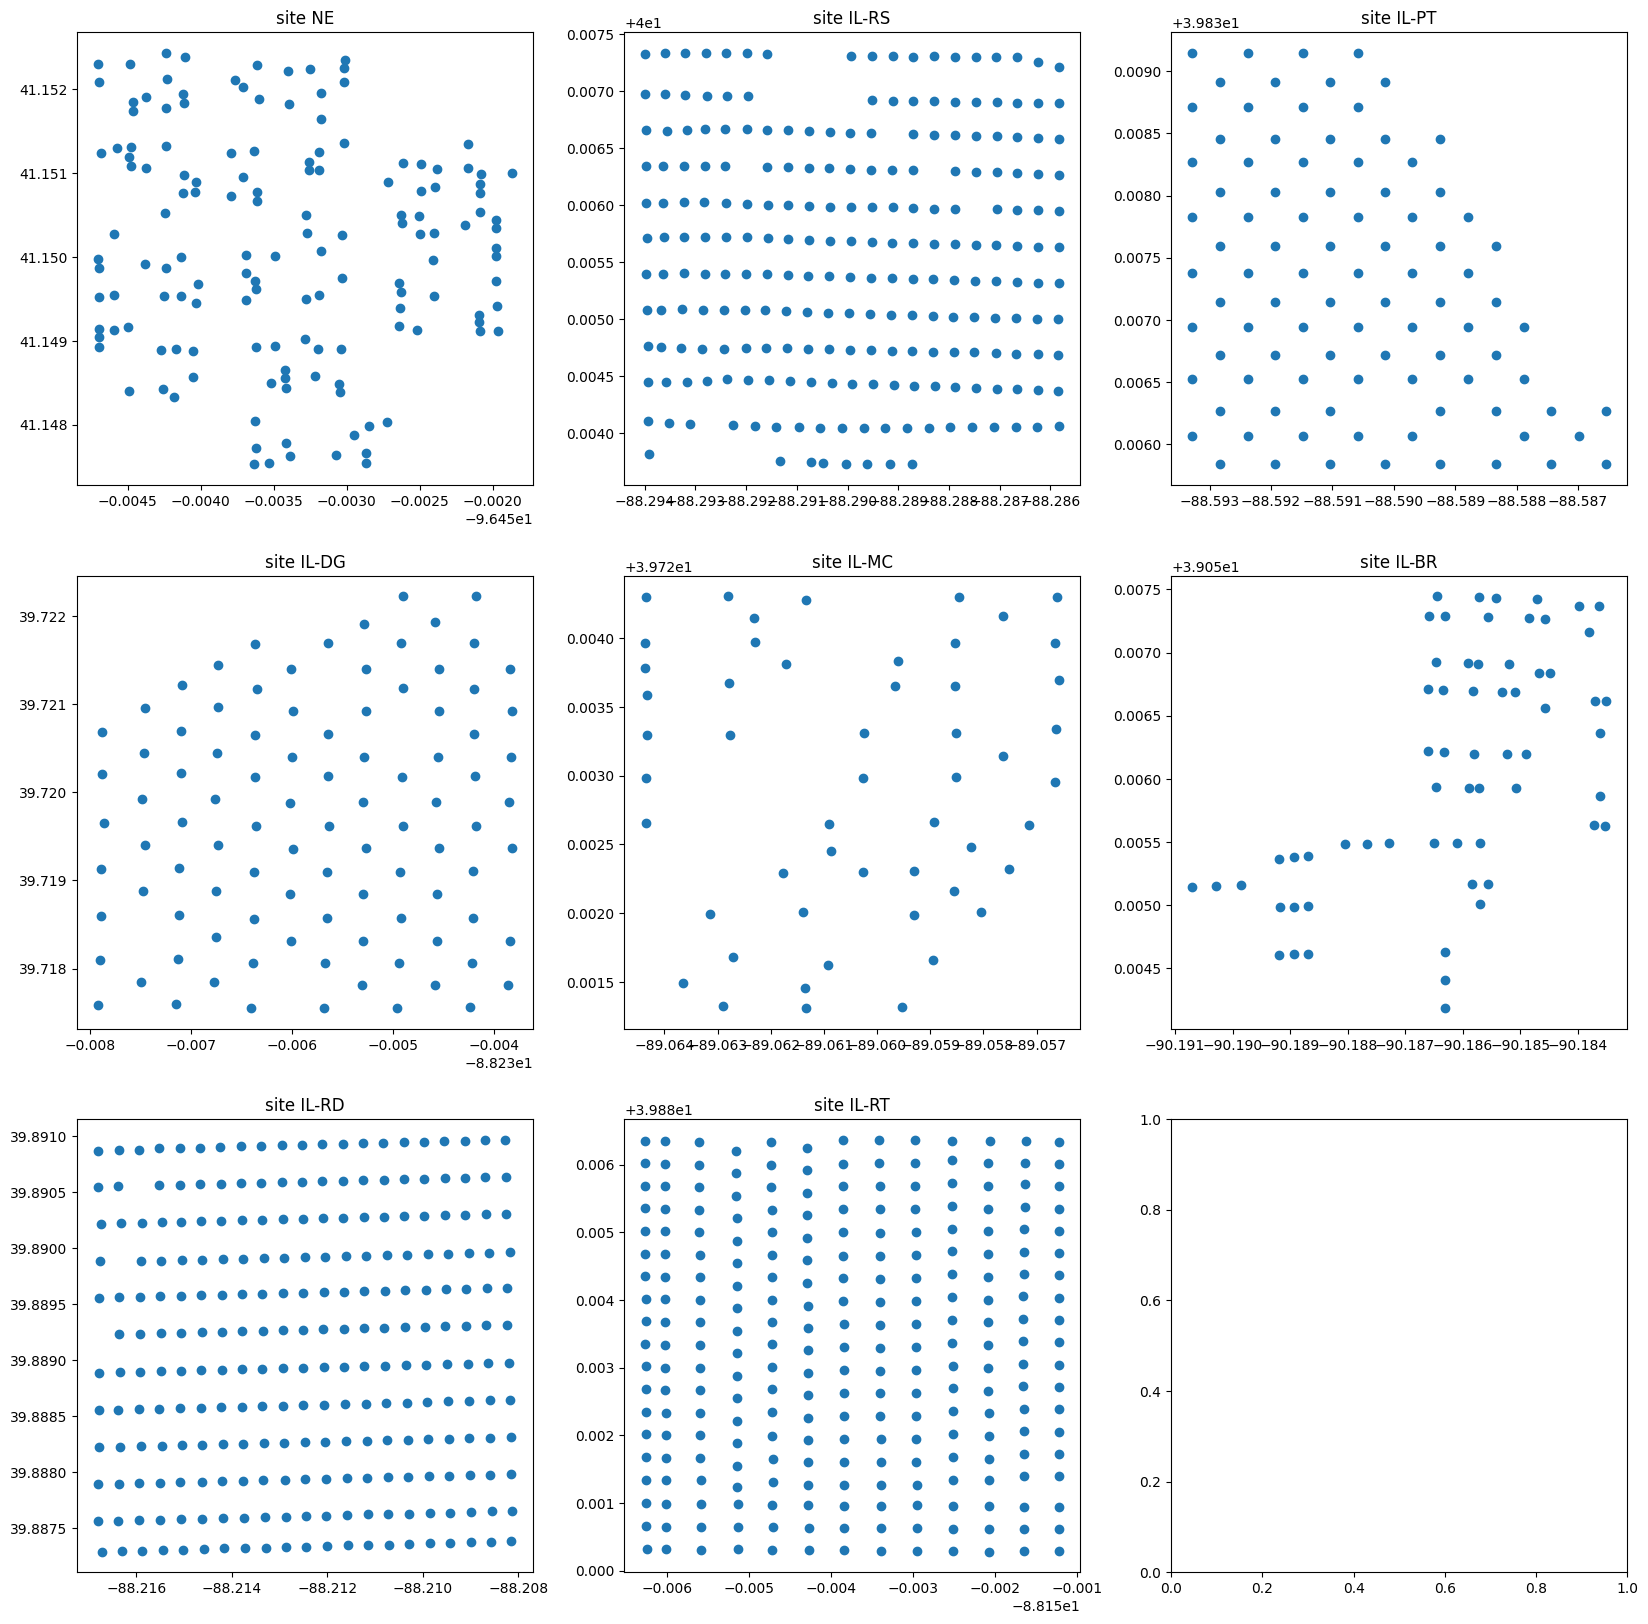

In [19]:
import matplotlib.pyplot as plt

sites = {}

for index in df_loc.index:
    site = df_loc['site'].iloc[index]
    x = df_loc['X'].iloc[index]
    y = df_loc['Y'].iloc[index]

    if site not in sites:
        sites[site] = {
            "x" : [],
            "y" : []
        }

    sites[site]["x"].append(x)
    sites[site]["y"].append(y)

figure, axes = plt.subplots(3, 3, figsize=(20, 20))

cont = 1
for site in sites:
    plt.subplot(3, 3, cont)
    plt.scatter(sites[site]['x'], sites[site]['y'])
    plt.title("site " + str(site))
    cont += 1

In [10]:
import pandas as pd

df_mea = pd.read_csv('./data/U.S. Midwest fields/measurements.csv')

df_mea

,site,location_id,sample_depth_min,sample_depth_max,SOCc,BD
0,NE,101A0001,0,5.0,2.039450,1.335931
1,NE,101A0001,5,15.0,1.725364,1.512957
2,NE,101A0001,15,30.0,1.678135,1.244744
3,NE,101A0001,30,60.0,1.076969,1.391142
4,NE,101A0001,60,90.0,0.553813,1.471202
...,...,...,...,...,...,...
3972,IL-RT,RT-M17,30,60.0,1.010000,1.200786
3973,IL-RT,RT-M18,0,30.0,1.060000,1.279252
3974,IL-RT,RT-M18,30,60.0,0.600000,1.168117
3975,IL-RT,RT-M19,0,30.0,1.450000,1.134687


In [20]:
sites = {}

for index in df_mea.index:
    site = df_mea['site'].iloc[index]
    sample_depth_min = df_mea['sample_depth_min'].iloc[index]
    sample_depth_max = int(df_mea['sample_depth_max'].iloc[index])
    SOCc = df_mea['SOCc'].iloc[index]
    BD = df_mea['BD'].iloc[index]

    if site not in sites:
        sites[site] = {}

    key = str(sample_depth_min) + "-" + str(sample_depth_max)

    if key not in sites[site]:
        sites[site][key] = {
            "SOCc" : [],
            "BD" : []
        }

    sites[site][key]['SOCc'].append(SOCc)
    sites[site][key]['BD'].append(SOCc)

for site in sites:
    print("site :", site)
    for key in sites[site]:
        print("in", key, "topsoil, mean SOCc is", 
              sum(sites[site][key]["SOCc"]) / len(sites[site][key]["SOCc"]),
              "and mean BD is", 
              sum(sites[site][key]["BD"]) / len(sites[site][key]["BD"]))
    print()

site : NE
in 0-5 topsoil, mean SOCc is 2.0201474154061163 and mean BD is 2.0201474154061163
in 5-15 topsoil, mean SOCc is 1.574658713405794 and mean BD is 1.574658713405794
in 15-30 topsoil, mean SOCc is 1.487958569462338 and mean BD is 1.487958569462338
in 30-60 topsoil, mean SOCc is 1.000143652921155 and mean BD is 1.000143652921155
in 60-90 topsoil, mean SOCc is 0.5765020878509611 and mean BD is 0.5765020878509611
in 90-120 topsoil, mean SOCc is 0.35731145503933226 and mean BD is 0.35731145503933226

site : IL-RS
in 0-30 topsoil, mean SOCc is 1.9104488888888902 and mean BD is 1.9104488888888902
in 30-60 topsoil, mean SOCc is 1.0838868778280542 and mean BD is 1.0838868778280542
in 30-56 topsoil, mean SOCc is 1.52 and mean BD is 1.52
in 30-58 topsoil, mean SOCc is 1.26 and mean BD is 1.26
in 30-49 topsoil, mean SOCc is 0.688 and mean BD is 0.688

site : IL-PT
in 0-15 topsoil, mean SOCc is 2.1570967741935485 and mean BD is 2.1570967741935485
in 15-30 topsoil, mean SOCc is 1.65956521739